# SVM

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X = iris_df.drop('target', axis=1)
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [0.1, 1, 10, 100, 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid = GridSearchCV(SVC(), param_grid, verbose=1)
grid.fit(X_train, y_train)


# print best parameters
print(grid.best_params_)

# print best estimator
print(grid.best_estimator_)

# print best score
print(grid.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=0.1, gamma=0.1, kernel='poly')
0.9583333333333334


In [25]:
import numpy as np

def create_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\phaa2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


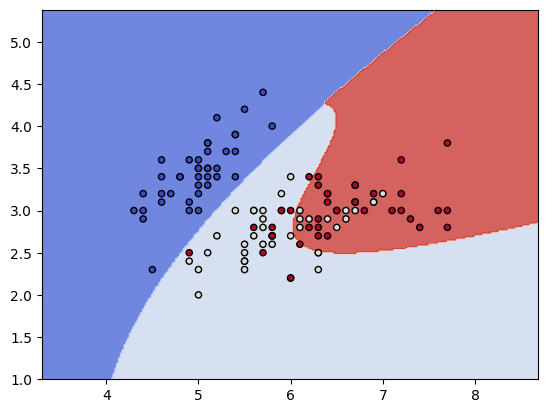

In [26]:
import matplotlib.pyplot as plt

# Reduce the feature set to two features
X_train_reduced = X_train.iloc[:, :2]
X_test_reduced = X_test.iloc[:, :2]

# Refit the model with the reduced feature set
grid_reduced = GridSearchCV(SVC(), param_grid, verbose=1)
grid_reduced.fit(X_train_reduced, y_train)

fig, ax = plt.subplots()

X0, X1 = X_train_reduced.iloc[:, 0], X_train_reduced.iloc[:, 1]
xx, yy = create_meshgrid(X0, X1)

plot_contours(ax, grid_reduced, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()